# Lab 4: Supervised Learning II - Classification Models

In this lab, we will cover the following topics:
1. Classification models for binary outcomes:
    * k-NN, 
    * decision trees, 
    * random forest, and 
    * SVM
2. Model evaluation
3. Hyperparameter tuning

Each section includes basic implementation and questions for further exploration.


## 1. Classification Models for Binary Outcomes

We will start by implementing various classification models to predict binary outcomes. We will also explore different parameters and visualize the results.

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve, average_precision_score

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, weights=[0.1, 0.9], random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [7]:
make_classification?

Signature:
make_classification(
    n_samples=100,
    n_features=20,
    *,
    n_informative=2,
    n_redundant=2,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=2,
    weights=None,
    flip_y=0.01,
    class_sep=1.0,
    hypercube=True,
    shift=0.0,
    scale=1.0,
    shuffle=True,
    random_state=None,
)
Docstring:
Generate a random n-class classification problem.

This initially creates clusters of points normally distributed (std=1)
about vertices of an ``n_informative``-dimensional hypercube with sides of
length ``2*class_sep`` and assigns an equal number of clusters to each
class. It introduces interdependence between these features and adds
various types of further noise to the data.

Without shuffling, ``X`` horizontally stacks features in the following
order: the primary ``n_informative`` features, followed by ``n_redundant``
linear combinations of the informative features, followed by ``n_repeated``
duplicates, drawn randomly with replacement from the infor

### 1.1 k-Nearest Neighbors (k-NN)
Next, we will implement a k-Nearest Neighbours classifier. We will also explore different parameters and visualize the results.

In [15]:
KNeighborsClassifier?

Init signature:
KNeighborsClassifier(
    n_neighbors=5,
    *,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None,
)
Docstring:     
Classifier implementing the k-nearest neighbors vote.

Read more in the :ref:`User Guide <classification>`.

Parameters
----------
n_neighbors : int, default=5
    Number of neighbors to use by default for :meth:`kneighbors` queries.

weights : {'uniform', 'distance'}, callable or None, default='uniform'
    Weight function used in prediction.  Possible values:

    - 'uniform' : uniform weights.  All points in each neighborhood
      are weighted equally.
    - 'distance' : weight points by the inverse of their distance.
      in this case, closer neighbors of a query point will have a
      greater influence than neighbors which are further away.
    - [callable] : a user-defined function which accepts an
      array of distances, and returns an array of the same shape

In [ ]:
# Function provided by prof during lab
def plot_curves(tpr,fpr,auroc,precision,recall,auprc,model_name):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
 
    # Plot ROC curve
    ax1.plot(fpr, tpr, color='green', lw=2, label='AUROC = %0.2f' % auroc)
    ax1.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random')
    ax1.set_xlim([0.0, 1.0])
    ax1.set_ylim([0.0, 1.05])
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax1.set_title('{} ROC Curve'.format(model_name))
    ax1.legend(loc='lower right')
 
    # Plot Precision-Recall curve
    ax2.plot(recall, precision, color='purple', lw=2, label='AUPRC = %0.2f' % auprc)
    ax2.axhline(y=minority_class, color='red', lw=2, linestyle='--', label='Random')
    ax2.set_xlabel('Recall')
    ax2.set_ylabel('Precision')
    ax2.set_title('{} Precision-Recall Curve'.format(model_name))
    ax2.legend(loc='lower left')
 
    plt.tight_layout()
    plt.show()

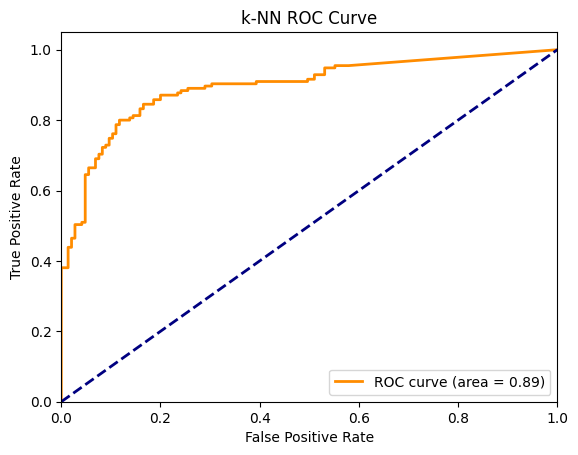

In [61]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()

# SPLIT DATA FIRST. Then scale training data features (not target) and testing data features (not target) separately.

# Train a k-NN classifier
knn = KNeighborsClassifier(n_neighbors=5, weights='distance' ,metric='manhattan')
knn.fit # Try scaling the model to see what happens
# knn.fit(X_train, y_train)
# Predict probabilities
y_scores_knn = knn.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_scores_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot ROC curve
plt.figure()
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('k-NN ROC Curve')
plt.legend(loc='lower right')
plt.show()




#### Questions for Exploration
   - How does scaling or reducing the number of features affect the performance of the k-NN classifier?

   

   - What happens to the ROC curve and AUC score when you increase or decrease the number of neighbors?

The ROC AUC decreases with fewer neighbours. With more neighbours the AUC ROC increases, but it does get to a point where a really high number of neighbours begins to decrease the ROC AUC, so this parameter can definitely be optimized. Larger values of k create smoother boundaries between neighbourhoods - this means that data close to the boundary is difficult to classify, and in this case, AUC is reduced. Small values of k mean the decision boundary is determined more heavily by the closest datapoints, making more complex decision boundaries and may lead to overfitting.

The value of k you should use depends on the distribution of your data. 

When to use small k: When data classes are well separated

When to use large k: When data classes overlap

   - How does the choice of distance metric (e.g., Euclidean, Manhattan) impact the performance of the k-NN classifier?

   Euclidean vs minkowski both gave the same ROC AUC, while manhattan performed better. Minkowski is a generalized version of euclidean (euclidean being the shortest direct path between two points), so it makes sense that they generated similar ROC AUC curves. 

   Manhattan distance can be beneficial when features have different scales or when the data is more sensitive to changes in individual dimensions rather than the overall magnitude of the difference.

### 1.2 Decision Tree
Next, we will implement a Decision Tree classifier. We will also explore different parameters and visualize the results.

In [5]:
DecisionTreeClassifier?

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
    monotonic_cst=None,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None

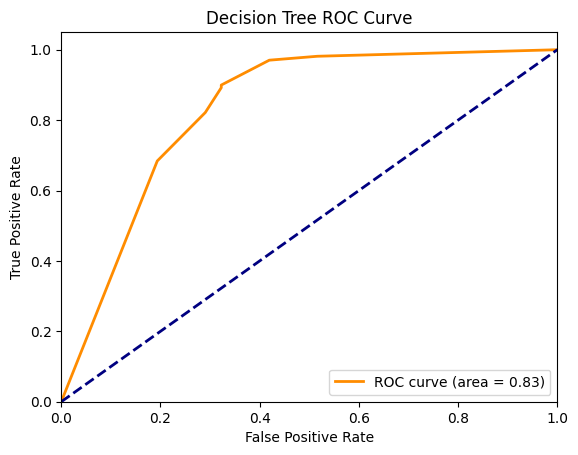

In [65]:
# Train a decision tree classifier
tree = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=4, min_samples_split=4, min_samples_leaf=5)
tree.fit(X_train, y_train)

# Predict probabilities
y_scores_tree = tree.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_scores_tree)
roc_auc_tree = auc(fpr_tree, tpr_tree)

# Plot ROC curve
plt.figure()
plt.plot(fpr_tree, tpr_tree, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_tree)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend(loc='lower right')
plt.show()


### Questions for Exploration
   - How does changing the maximum depth (`max_depth`) of the decision tree affect its performance?

   higher max depth = more complex model = more prone to overfitting
   lower max depth = simpler model with more flexibility 

   This dataset performs slightly better with a lower max depth (4), because there are only two informative features in this dataset.

   - What is the impact of using different criteria for splitting (e.g., `gini`, `entropy`) on the decision tree's performance?

Entropy resulted in slightly better model performance (0.91 to 0.92)

   - How does pruning the decision tree (by setting `min_samples_split` or `min_samples_leaf`) affect its performance and complexity?

   Increasing min sample split from 2 to 4 increased the ROC AUC by 0.01. Reduces complexity? 
   Increasing min samples leaf while min samples split stays the same basically cancels out the effect of min samples split on model accuracy because if min samples split < min samples leaf, splits that may have been allowed with lower min samples leaf are no longer allowed. So this can result in "cancelling out" the increase in accuracy gained by min samples split in certain situations. 

   For instance, if min_samples_split = 5, and there are 7 samples at an internal node, then the split is allowed. But let's say the split results in two leaves, one with 1 sample, and another with 6 samples. If min_samples_leaf = 2, then the split won't be allowed (even if the internal node has 7 samples) because one of the leaves resulted will have less then the minimum number of samples required to be at a leaf node.

### 1.3 Random Forest
Next, we will implement a Random Forest classifier. We will also explore different parameters and visualize the results.

In [19]:
RandomForestClassifier?

Init signature:
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
    monotonic_cst=None,
)
Docstring:     
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
Trees in the forest use the best split strategy, i.e. equivalent to passing
`splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeRegressor`.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the 

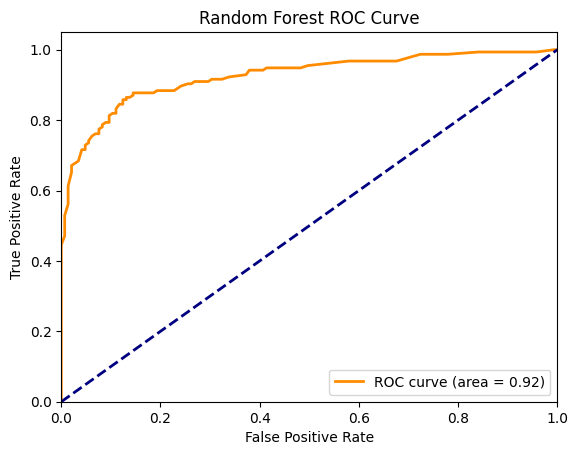

In [57]:
# Train a random forest classifier
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train, y_train)

# Predict probabilities
y_scores_forest = forest.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr_forest, tpr_forest, _ = roc_curve(y_test, y_scores_forest)
roc_auc_forest = auc(fpr_forest, tpr_forest)

# Plot ROC curve
plt.figure()
plt.plot(fpr_forest, tpr_forest, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_forest)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc='lower right')
plt.show()


### Questions for Exploration
   - How does changing the number of trees (`n_estimators`) in the random forest affect its performance and stability?

Adding more trees doesn't necessarily increase performance past a certain point. With more complex features, more estimators would increase model performance and computational load. 

   - What is the impact of changing the maximum depth (`max_depth`) of the trees in the random forest?
   - How does the random forest handle overfitting compared to a single decision tree?

### 1.4 Support Vector Machine (SVM)
Next, we will implement a Support Vector Machine classifier (SVC). We will also explore different parameters and visualize the results.

In [21]:
SVC?

Init signature:
SVC(
    *,
    C=1.0,
    kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.0,
    shrinking=True,
    probability=False,
    tol=0.001,
    cache_size=200,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovr',
    break_ties=False,
    random_state=None,
)
Docstring:     
C-Support Vector Classification.

The implementation is based on libsvm. The fit time scales at least
quadratically with the number of samples and may be impractical
beyond tens of thousands of samples. For large datasets
consider using :class:`~sklearn.svm.LinearSVC` or
:class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
:class:`~sklearn.kernel_approximation.Nystroem` transformer or
other :ref:`kernel_approximation`.

The multiclass support is handled according to a one-vs-one scheme.

For details on the precise mathematical formulation of the provided
kernel functions and how `gamma`, `coef0` and `degree` affect each
other, see the

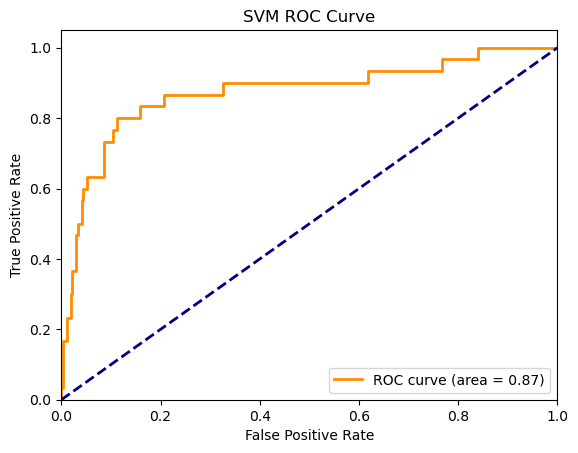

In [22]:
# Train an SVM classifier
svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)

# Predict probabilities
y_scores_svm = svm.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_scores_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC curve
plt.figure()
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.legend(loc='lower right')
plt.show()


### Questions for Exploration
   - How does changing the regularization parameter (`C`) affect the performance of the SVM classifier?
   - What is the impact of using different kernel functions (e.g., `linear`, `rbf`, `poly`) on the SVM's performance?
   - How does the choice of kernel parameters (e.g., `gamma` for the RBF kernel) influence the SVM's decision boundary?

## 2. Model Evaluation

We will evaluate the models using various metrics such as accuracy, precision, recall, F1 score, and ROC AUC.

In [66]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Evaluate the models
models = {'k-NN': knn, 'Decision Tree': tree, 'Random Forest': forest, 'SVM': svm}
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"{name} - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")


NameError: name 'svm' is not defined

### Questions for Exploration
   - How do the accuracy, precision, recall, and F1 score compare across different classifiers?
   - What are the trade-offs between precision and recall for each classifier, and how can you visualize these trade-offs using Precision-Recall curves?
   - How does the class imbalance in the dataset affect the evaluation metrics, and what techniques can be used to address this imbalance?

## 3. Hyperparameter Tuning

We will perform hyperparameter tuning using grid search to find the best parameters for each model.

In [24]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids - these are the hyperparameters that the model will be tested with
param_grid_knn = {'n_neighbors': [3, 5, 7, 9]}
param_grid_tree = {'max_depth': [None, 10, 20, 30]}
param_grid_forest = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Perform grid search
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_search_tree = GridSearchCV(DecisionTreeClassifier(), param_grid_tree, cv=5, scoring='accuracy')
grid_search_forest = GridSearchCV(RandomForestClassifier(), param_grid_forest, cv=5, scoring='accuracy')
grid_search_svm = GridSearchCV(SVC(probability=True), param_grid_svm, cv=5, scoring='accuracy')

grid_search_knn.fit(X_train, y_train)
grid_search_tree.fit(X_train, y_train)
grid_search_forest.fit(X_train, y_train)
grid_search_svm.fit(X_train, y_train)

# Print best parameters and scores
print(f"Best parameters for k-NN: {grid_search_knn.best_params_}")
print(f"Best score for k-NN: {grid_search_knn.best_score_}")

print(f"Best parameters for Decision Tree: {grid_search_tree.best_params_}")
print(f"Best score for Decision Tree: {grid_search_tree.best_score_}")

print(f"Best parameters for Random Forest: {grid_search_forest.best_params_}")
print(f"Best score for Random Forest: {grid_search_forest.best_score_}")

print(f"Best parameters for SVM: {grid_search_svm.best_params_}")
print(f"Best score for SVM: {grid_search_svm.best_score_}")


Best parameters for k-NN: {'n_neighbors': 5}
Best score for k-NN: 0.9228571428571429
Best parameters for Decision Tree: {'max_depth': None}
Best score for Decision Tree: 0.9385714285714286
Best parameters for Random Forest: {'max_depth': 10, 'n_estimators': 50}
Best score for Random Forest: 0.9542857142857143
Best parameters for SVM: {'C': 0.1, 'kernel': 'linear'}
Best score for SVM: 0.9442857142857143


### Questions for Exploration
   - How does hyperparameter tuning using grid search improve the performance of each classifier?
   - What are the best hyperparameters found for each classifier, and how do they compare to the default parameters?
   - How does the choice of cross-validation strategy (e.g., k-fold, stratified k-fold) impact the results of hyperparameter tuning?

## Extensions

1. **Feature Importance**
  * For tree-based models (decision tree and random forest), which features are the most important, and how can you visualize feature importance?
  * How does feature scaling (e.g., standardization, normalization) affect the performance of other distance-based classifiers (i.e., SVM)?

2. **Model Comparison**
  * Compare the performance of all classifiers on the same dataset using a single evaluation metric (e.g., ROC AUC) and visualize the results.
  * How do the classifiers perform on different types of datasets (e.g., datasets with different levels of noise, feature correlations)?